### **TRỰC QUAN SO SÁNH CÁC THUẬT TOÁN TÌM KIẾM - BFS, DFS, UCS, A***

#### **Lưu ý: Phải có đầy đủ 4 file test trong thư mục result: *test_ucs.csv*, *test_dfs.csv*, *test_bfs.csv*, test_astar.csv để trực quan dữ liệu.**

Chính vì thế, người dùng nên chạy test mỗi thuật toán khoảng 10 lần, để có thể lấy giá trị trung bình của các thông số trong từng thuật toán.

#### **Hiện tại, trong thư mục results đã có sẵn dữ liệu thống kê của 10 lần chạy cho mỗi thuật toán tại các file test_*.csv.***

- Nếu người dùng muốn bổ sung thêm những dữ liệu tiếp theo, người dùng có thể thực hiện chạy file  `test_main.py` cho thuật toán mình cần xét, khi đó, file test_*csv của thuật toán đó sẽ bổ sung dữ liệu vừa chạy vào trong file.

- Nếu người dùng muốn bắt đầu lại từ đầu, vui lòng xóa hết dữ liệu trong các file test_*.csv hoặc xóa file, và thực hiện chạy file `test_main.py` theo mong muốn của mình.

#### 1. Kiểm tra các thông tin cơ bản về dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đặt style cho các đồ thị
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Đọc dữ liệu từ các file
ucs_data = pd.read_csv('../../results/test_ucs.csv')
dfs_data = pd.read_csv('../../results/test_dfs.csv')
bfs_data = pd.read_csv('../../results/test_bfs.csv')
astar_data = pd.read_csv('../../results/test_astar.csv')

# Tạo một DataFrame hợp nhất để so sánh các thuật toán
ucs_data['Algorithm'] = 'UCS'
dfs_data['Algorithm'] = 'DFS'
bfs_data['Algorithm'] = 'BFS'
astar_data['Algorithm'] = 'A*'

all_data = pd.concat([ucs_data, dfs_data, bfs_data, astar_data], ignore_index=True)

# Hiển thị thông tin cơ bản về dữ liệu
print("Tổng số bản ghi:", len(all_data))
print("\nCác cột trong dữ liệu:")
for col in all_data.columns:
    print(f"- {col}")

Tổng số bản ghi: 200

Các cột trong dữ liệu:
- Test Case
- Algorithm
- Ghost Type
- Collision
- Duration (s)
- Search Time (s)
- Memory Peak (bytes)
- Expanded Nodes
- Nodes are passed
- Path Weight


In [2]:
# Định nghĩa các các chỉ số so sánh
metrics = ['Expanded Nodes', 'Nodes are passed', 'Path Weight', 'Search Time (s)', 'Duration (s)', 'Memory Peak (bytes)']

#### 2. So sánh các thuật toán theo từng chỉ số so sánh, bằng cách gom tất cả 5 test case, lấy trung bình các giá trị của mỗi chỉ số dựa theo thuật toán.

Điều này sẽ trả lời cho câu hỏi "Thuật toán nào tốt nhất nói chung?"

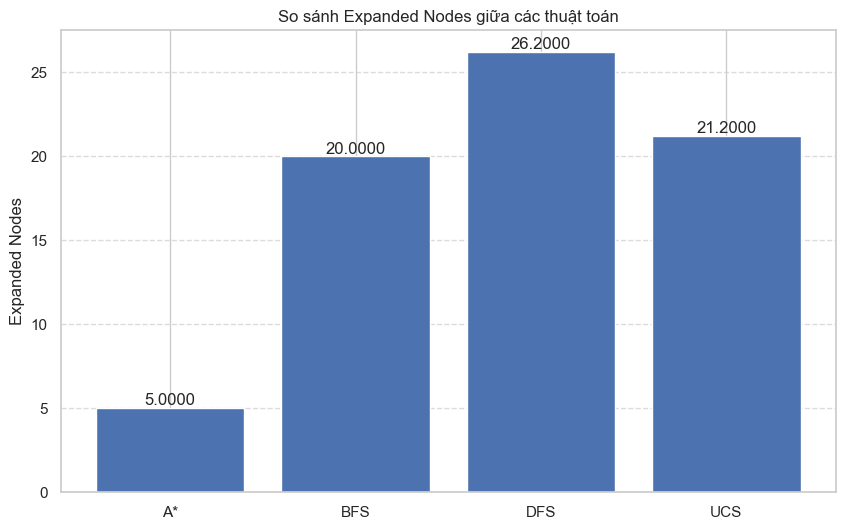

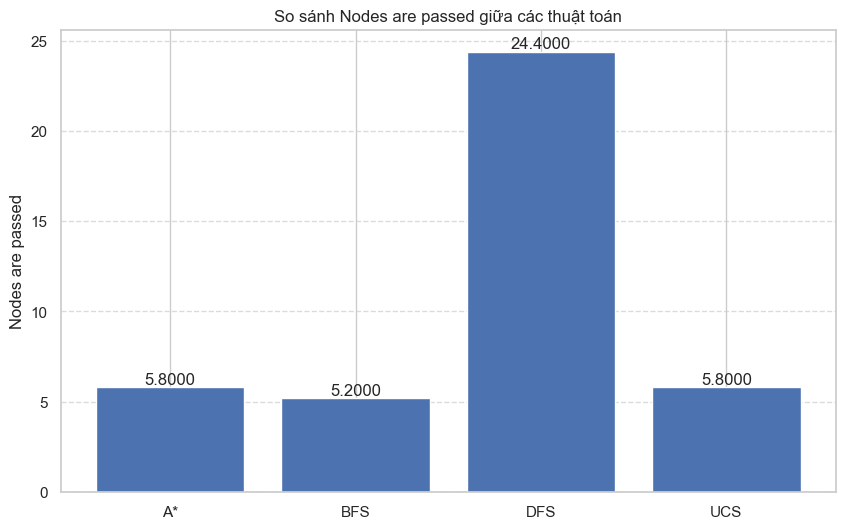

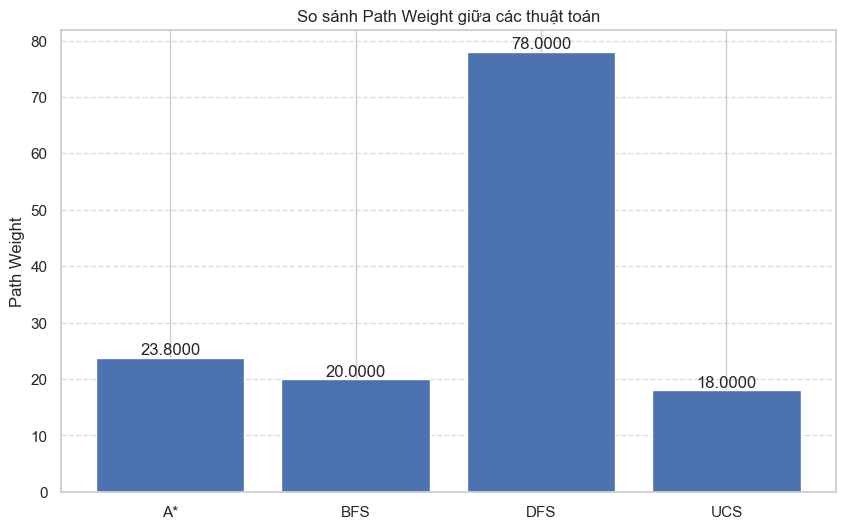

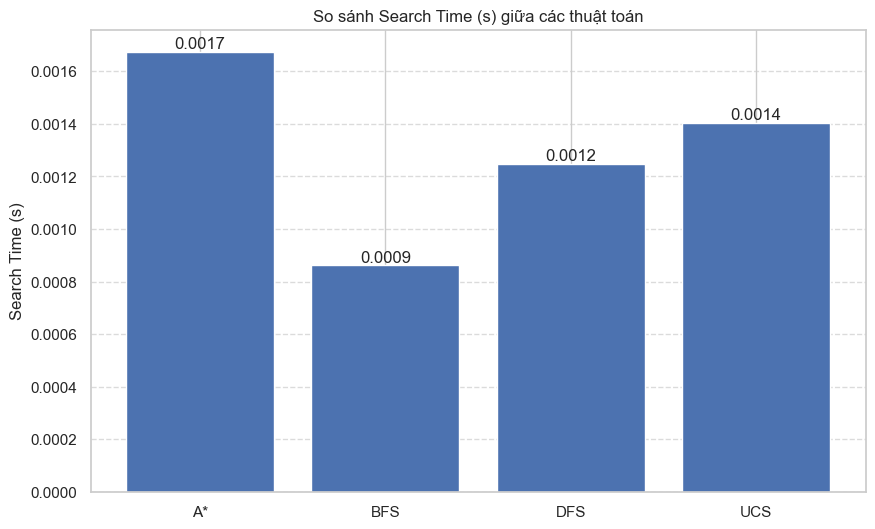

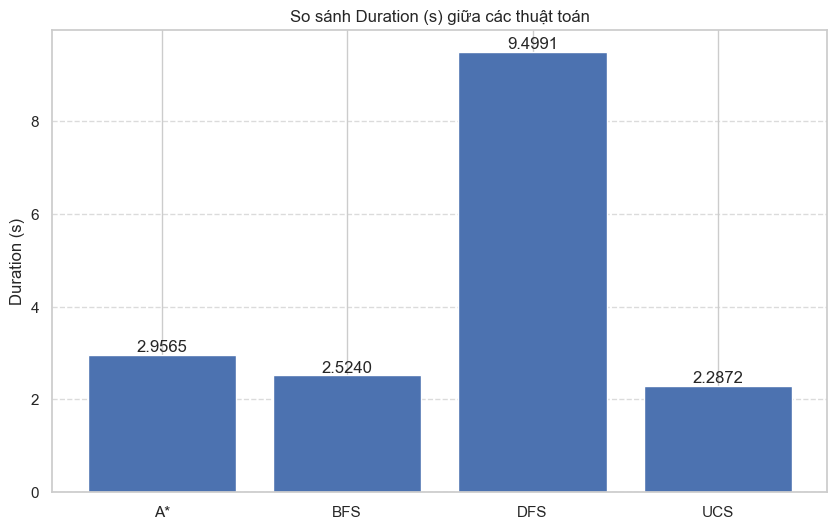

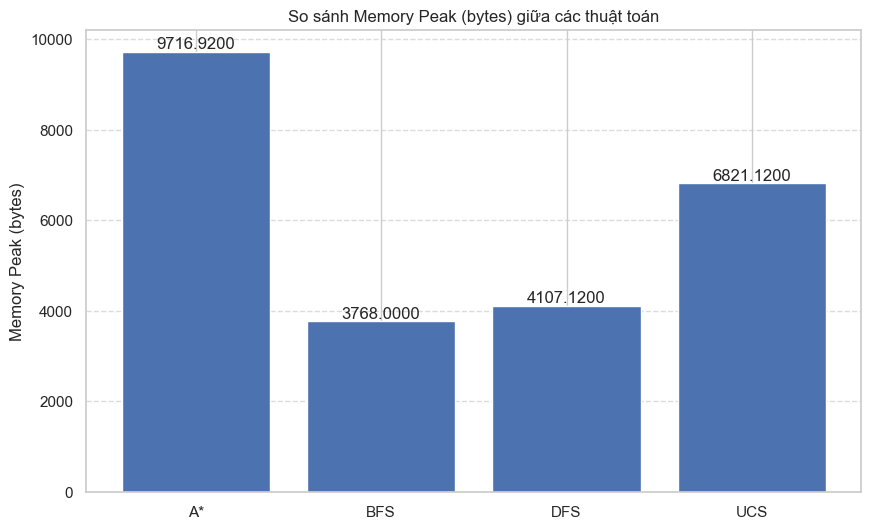

In [3]:
# So sánh các thuật toán theo từng chỉ số
def plot_algorithm_comparison(metric):
    plt.figure(figsize=(10, 6))
    
    # Tính giá trị trung bình cho mỗi thuật toán
    mean_values = all_data.groupby('Algorithm')[metric].mean()
    
    # Tạo biểu đồ cột
    bars = plt.bar(mean_values.index, mean_values.values)
    
    # Thêm nhãn giá trị trên đỉnh các cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')
    
    plt.title(f'So sánh {metric} giữa các thuật toán')
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Tạo biểu đồ so sánh cho từng thông số
for metric in metrics:
    plot_algorithm_comparison(metric)

#### 3. So sánh các thuật toán theo từng chỉ số so sánh, bằng cách lấy trung bình của chỉ số của mỗi loại test case.

Việc này sẽ trả lời cho câu hỏi "Thuật toán nào tốt nhất cho test case cụ thể nào?"

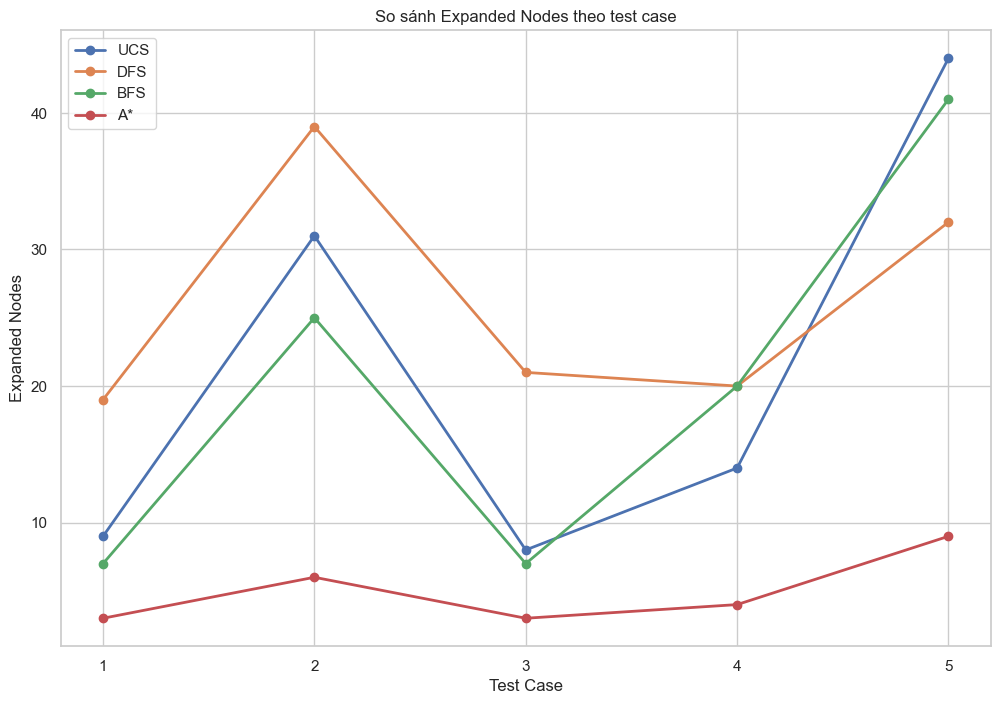

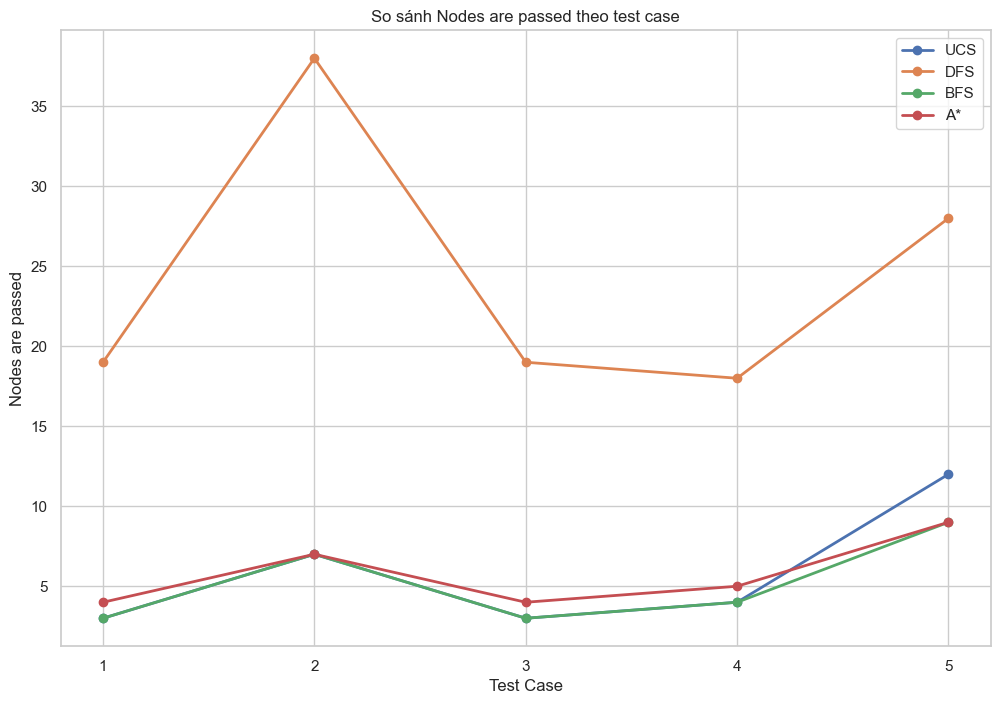

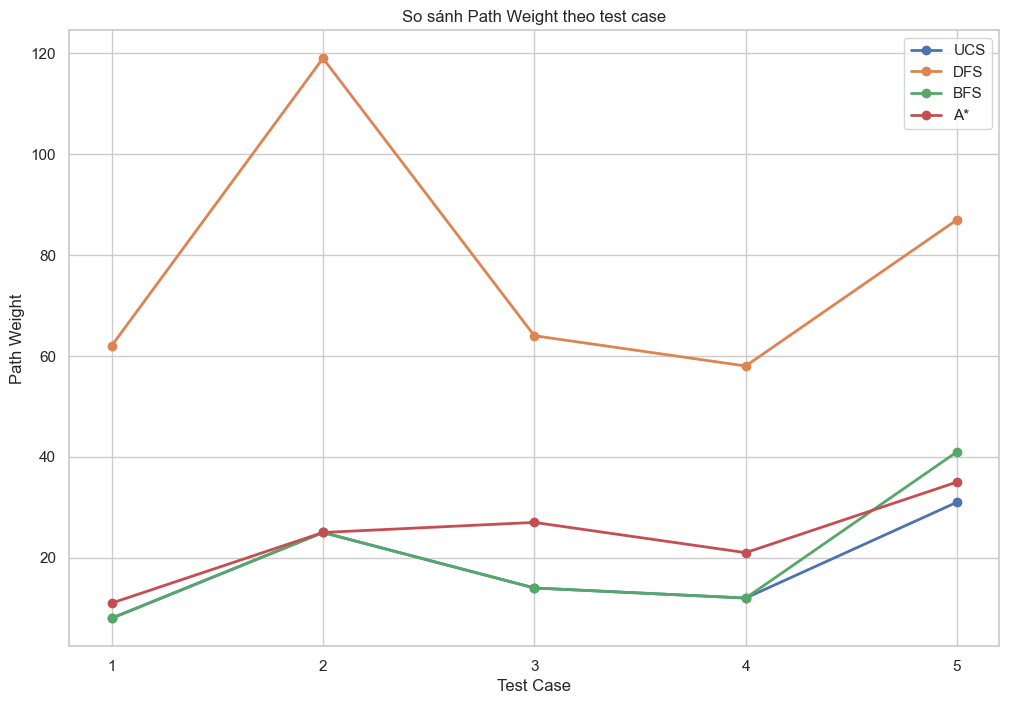

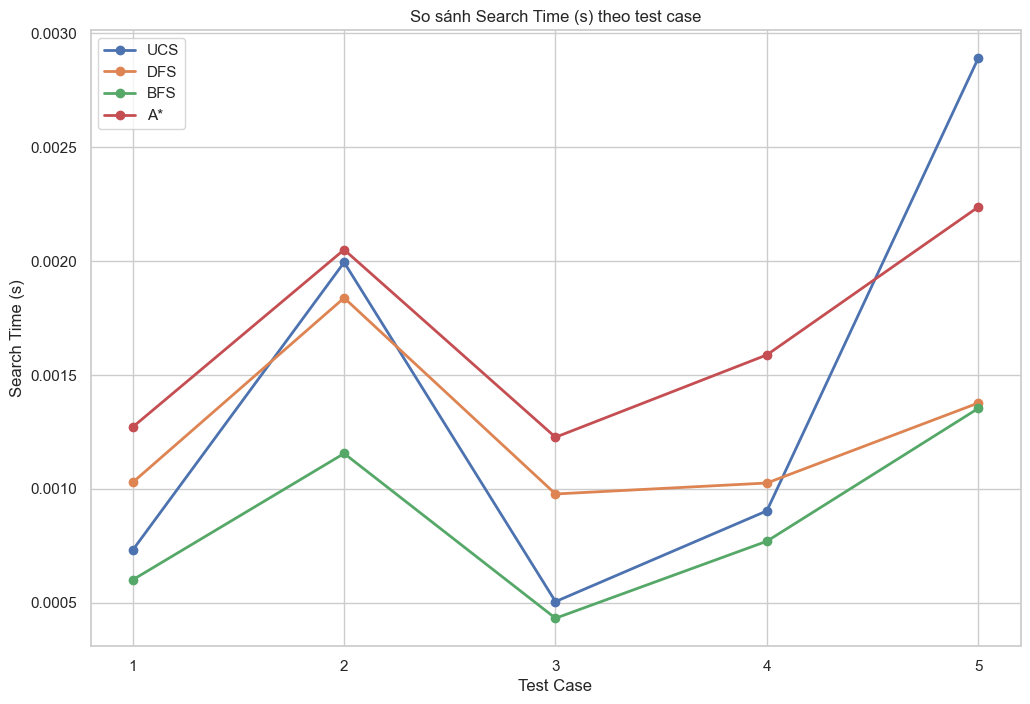

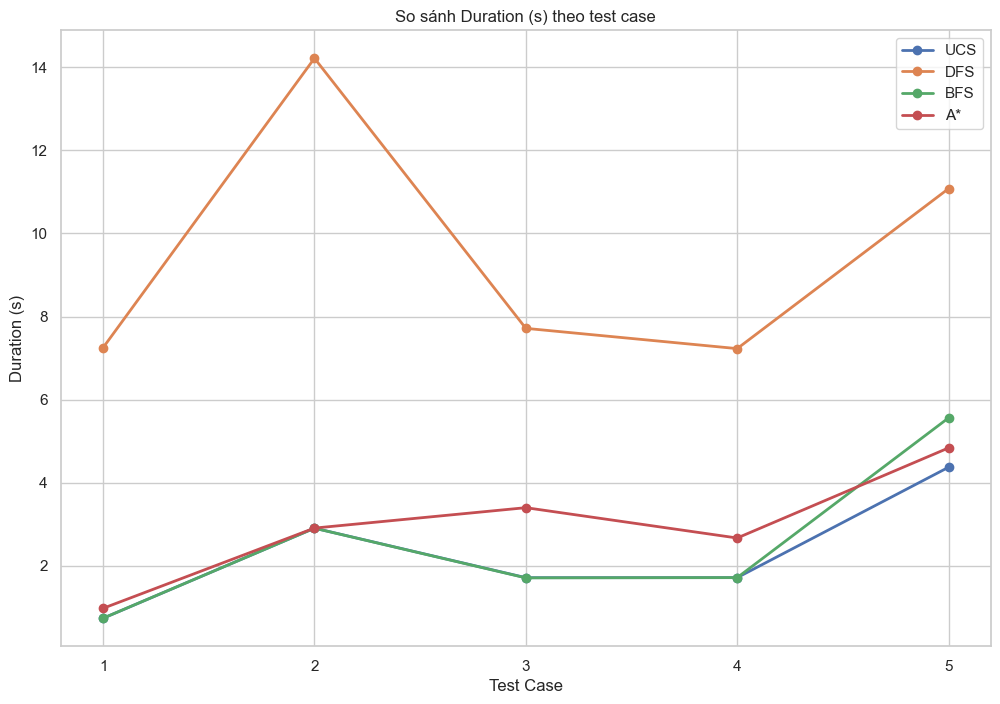

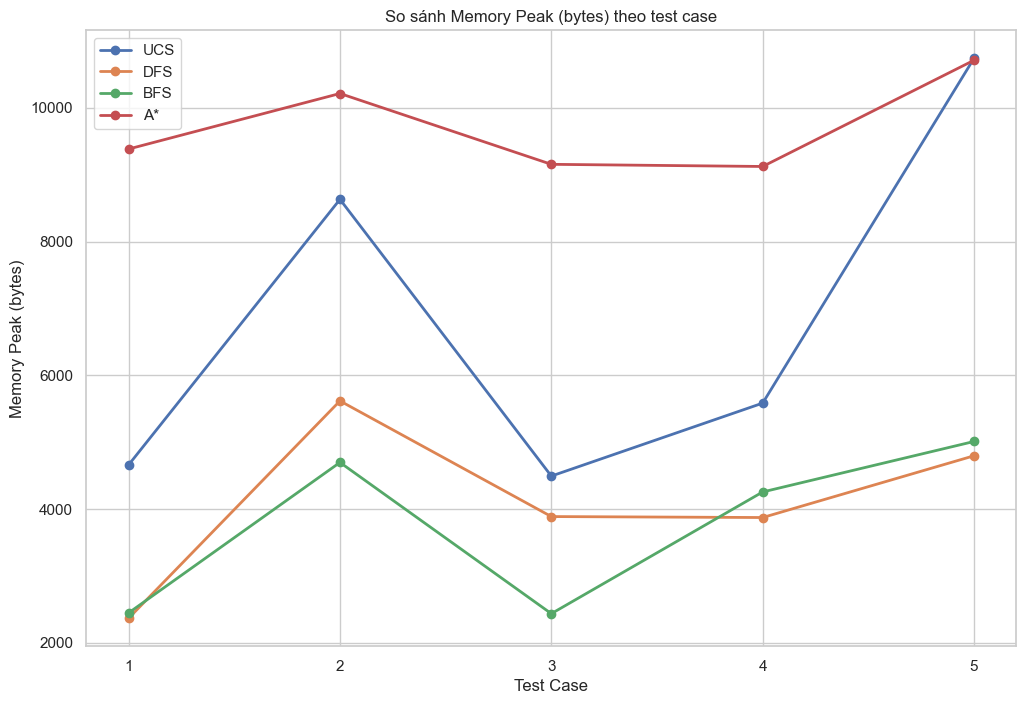

In [4]:
# So sánh hiệu suất các thuật toán theo từng test case
def plot_metric_by_test_case(metric):
    plt.figure(figsize=(12, 8))
    
    # Tính giá trị trung bình cho mỗi thuật toán và test case
    test_case_means = all_data.groupby(['Algorithm', 'Test Case'])[metric].mean().reset_index()
    
    # Vẽ biểu đồ đường
    for algo in ['UCS', 'DFS', 'BFS', 'A*']:
        algo_data = test_case_means[test_case_means['Algorithm'] == algo]
        plt.plot(algo_data['Test Case'], algo_data[metric], 
                 marker='o', linewidth=2, label=algo)
    
    plt.title(f'So sánh {metric} theo test case')
    plt.xlabel('Test Case')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, 6))
    plt.show()

# Tạo biểu đồ cho từng thông số
for metric in metrics:
    plot_metric_by_test_case(metric)

#### 4. So sánh phạm vi và sự phân tán của từng thông số của các thuật toán.

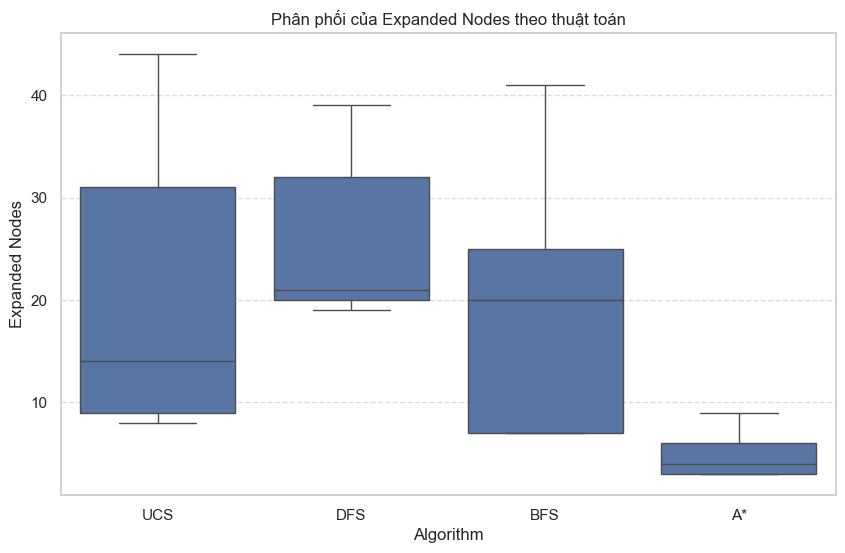

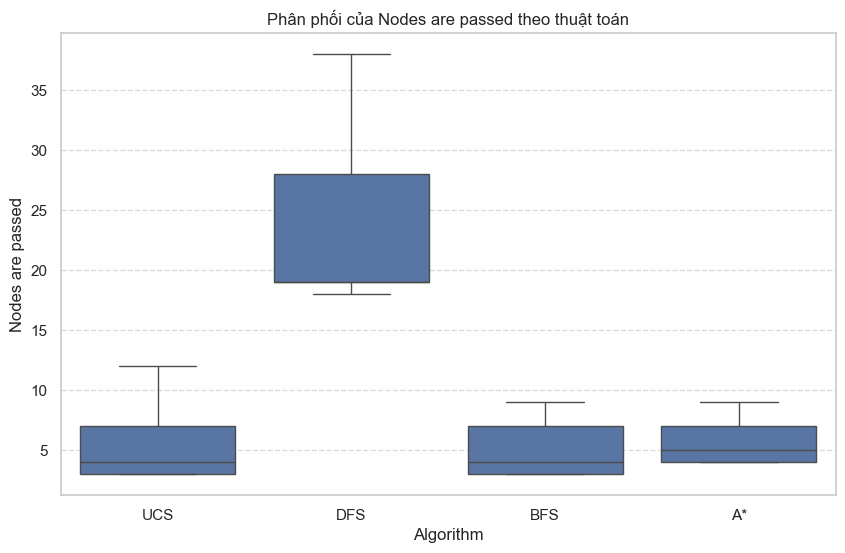

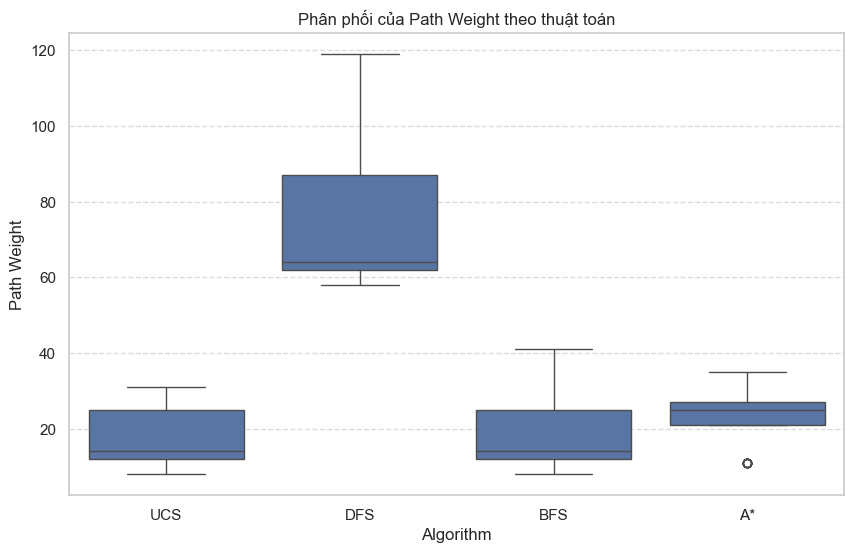

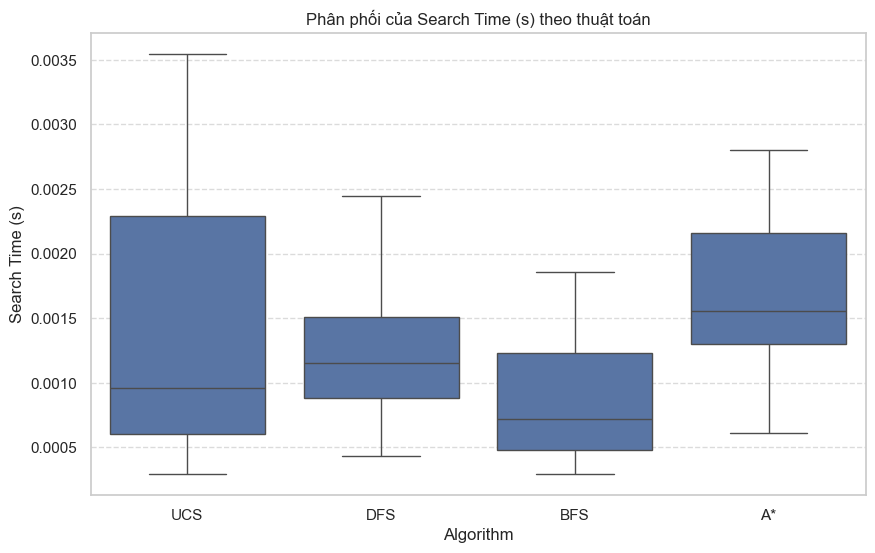

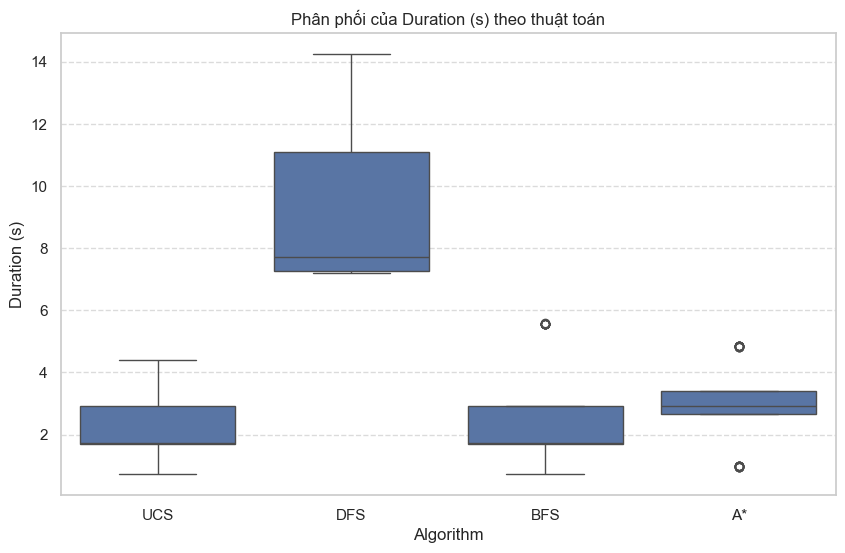

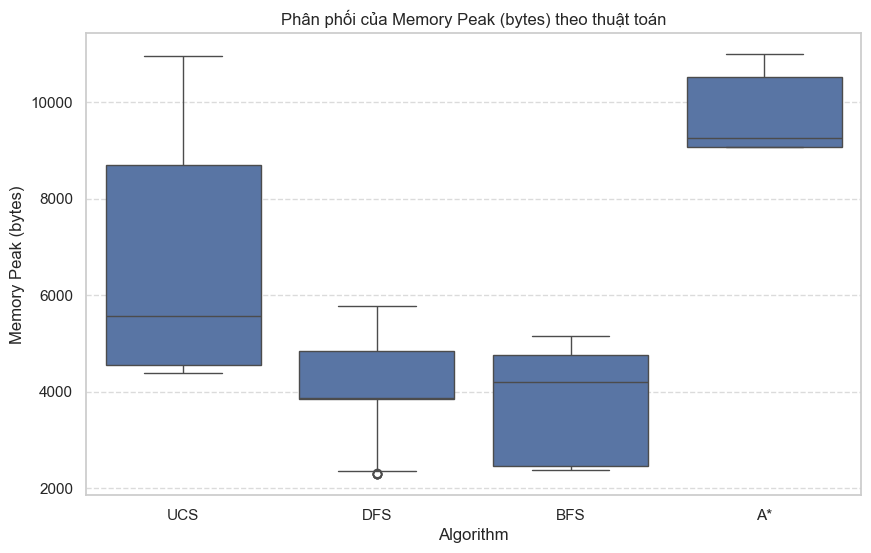

In [5]:
# Tạo boxplot để hiển thị phân phối của từng thông số
def plot_distribution(metric):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Algorithm', y=metric, data=all_data)
    plt.title(f'Phân phối của {metric} theo thuật toán')
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Tạo biểu đồ phân phối cho từng thông số
for metric in metrics:
    plot_distribution(metric)

#### 5. Tóm tắt hiệu suất của các thuật toán nói chung.

In [6]:
# Tạo bảng tóm tắt hiệu suất của các thuật toán
summary = all_data.groupby('Algorithm')[metrics].mean()
print("\nBảng tóm tắt hiệu suất của các thuật toán")
print(summary)

# Phân tích hiệu suất
def analyze_performance():
    fastest_search = summary['Search Time (s)'].idxmin()
    fastest_overall = summary['Duration (s)'].idxmin()
    lowest_memory = summary['Memory Peak (bytes)'].idxmin()
    fewest_expanded = summary['Expanded Nodes'].idxmin()
    shortest_path = summary['Path Weight'].idxmin()
    
    print("\nPhân tích hiệu suất")
    print(f"Thuật toán có thời gian tìm kiếm nhanh nhất: {fastest_search}")
    print(f"Thuật toán có thời gian thực thi tổng thể nhanh nhất: {fastest_overall}")
    print(f"Thuật toán sử dụng ít bộ nhớ nhất: {lowest_memory}")
    print(f"Thuật toán mở rộng ít nút nhất: {fewest_expanded}")
    print(f"Thuật toán tìm được đường đi ngắn nhất: {shortest_path}")

analyze_performance()


Bảng tóm tắt hiệu suất của các thuật toán
           Expanded Nodes  Nodes are passed  Path Weight  Search Time (s)  \
Algorithm                                                                   
A*                    5.0               5.8         23.8         0.001674   
BFS                  20.0               5.2         20.0         0.000862   
DFS                  26.2              24.4         78.0         0.001249   
UCS                  21.2               5.8         18.0         0.001404   

           Duration (s)  Memory Peak (bytes)  
Algorithm                                     
A*              2.95652              9716.92  
BFS             2.52398              3768.00  
DFS             9.49910              4107.12  
UCS             2.28716              6821.12  

Phân tích hiệu suất
Thuật toán có thời gian tìm kiếm nhanh nhất: BFS
Thuật toán có thời gian thực thi tổng thể nhanh nhất: UCS
Thuật toán sử dụng ít bộ nhớ nhất: BFS
Thuật toán mở rộng ít nút nhất: A*
Thuật toán